<a href="https://colab.research.google.com/github/shreyas1209/Sudoku_Solver_App/blob/main/sudoku_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import imutils

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
image = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku.jpg')
image1 = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku_1.jpg')
image2 = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku_2.jpg')
image3 = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku_3.jpg')
image4 = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku_4.jpg')

Transforms on image:

1.cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) converts the image to grayscale

2.Adding GaussianBlur


3.Image thresholding is an important intermediary step for image processing pipelines. Thresholding can help us to remove lighter or darker regions and contours of images

In [ ]:
from imutils.perspective import four_point_transform
from google.colab.patches import cv2_imshow
def sudoku_detector(img):
  image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2_imshow(image_gray)
  image_blur = cv2.GaussianBlur(image_gray,(5,5),3)
  cv2_imshow(image_blur)
  image_threshold = cv2.adaptiveThreshold(image_blur, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
  cv2_imshow(image_threshold)
  
  output = image_threshold
  contours = cv2.findContours(image_threshold.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  contours = imutils.grab_contours(contours)
  original_pic = img.copy()
  
  for i,contour in enumerate(contours):
    approx_box = cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour,True),True)
    if len(approx_box)==4:
      X,Y,W,H = cv2.boundingRect(approx_box)
      
      if (H>3 and W>3):
        cv2.drawContours(original_pic, [approx_box], 0, (0,0,255),5)
        cv2_imshow(original_pic)
        puzzle = four_point_transform(img, approx_box.reshape(4, 2))
        
	      
        

        cv2_imshow(puzzle)

      




  

  

    

  



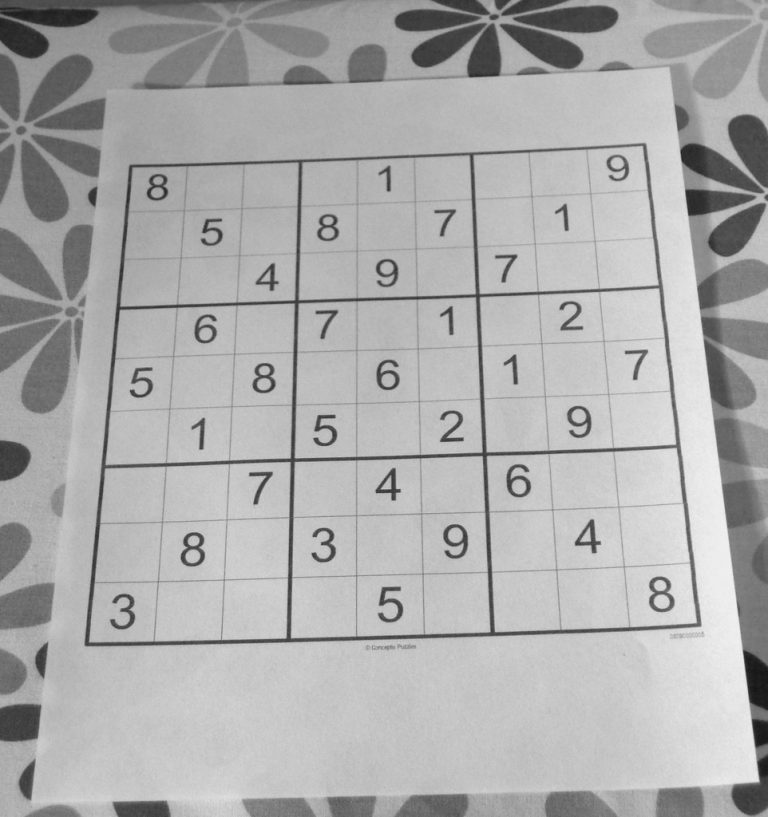

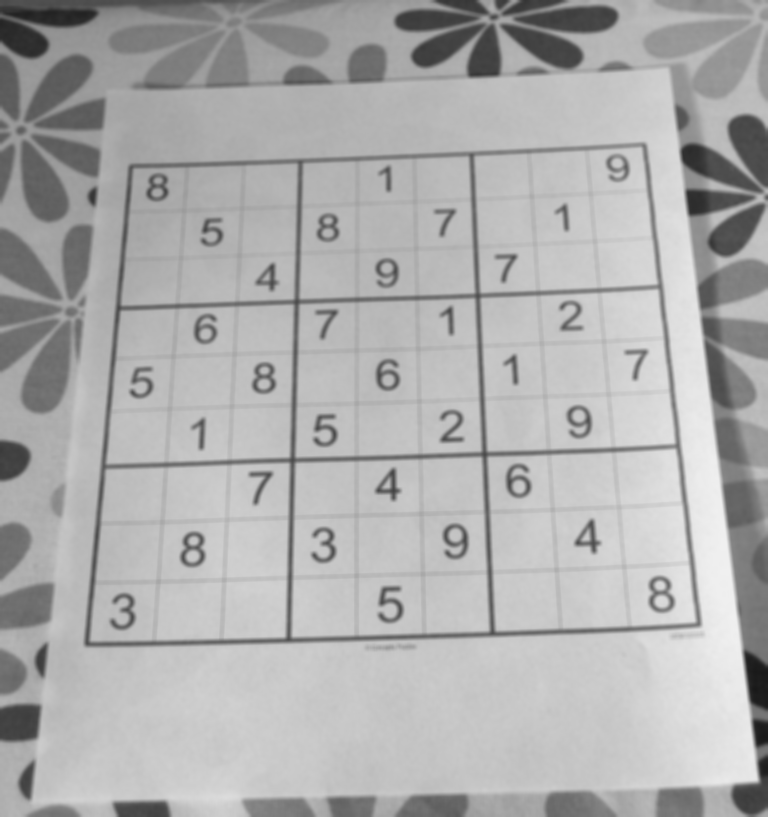

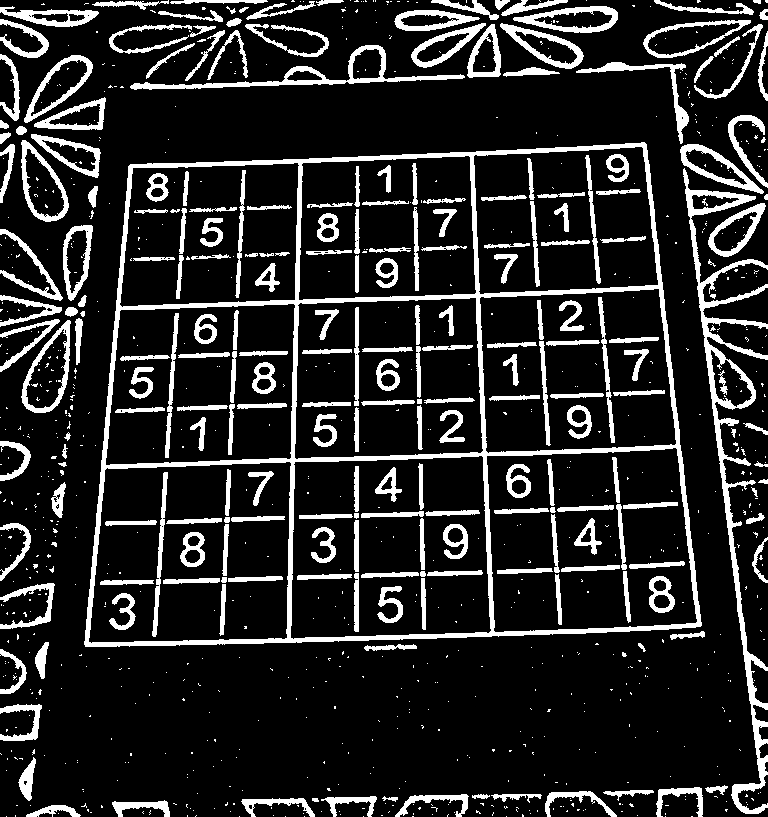

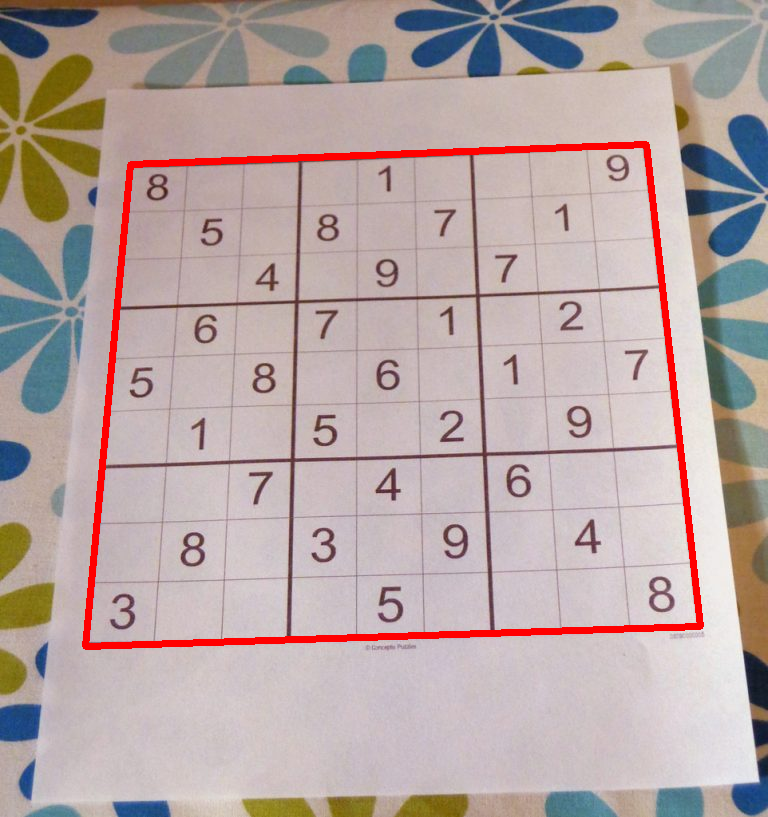

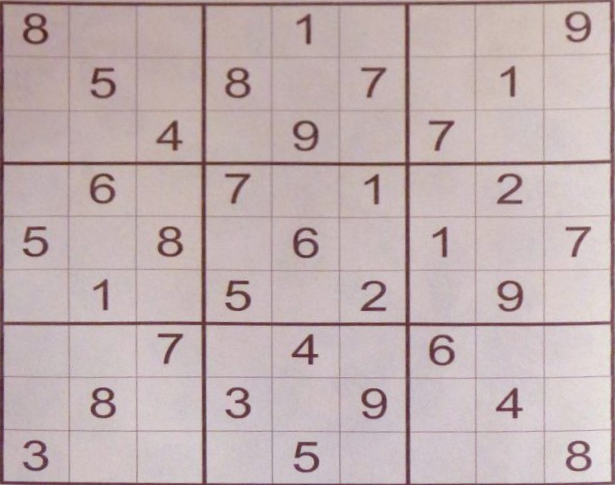

In [ ]:
sudoku_detector(image)

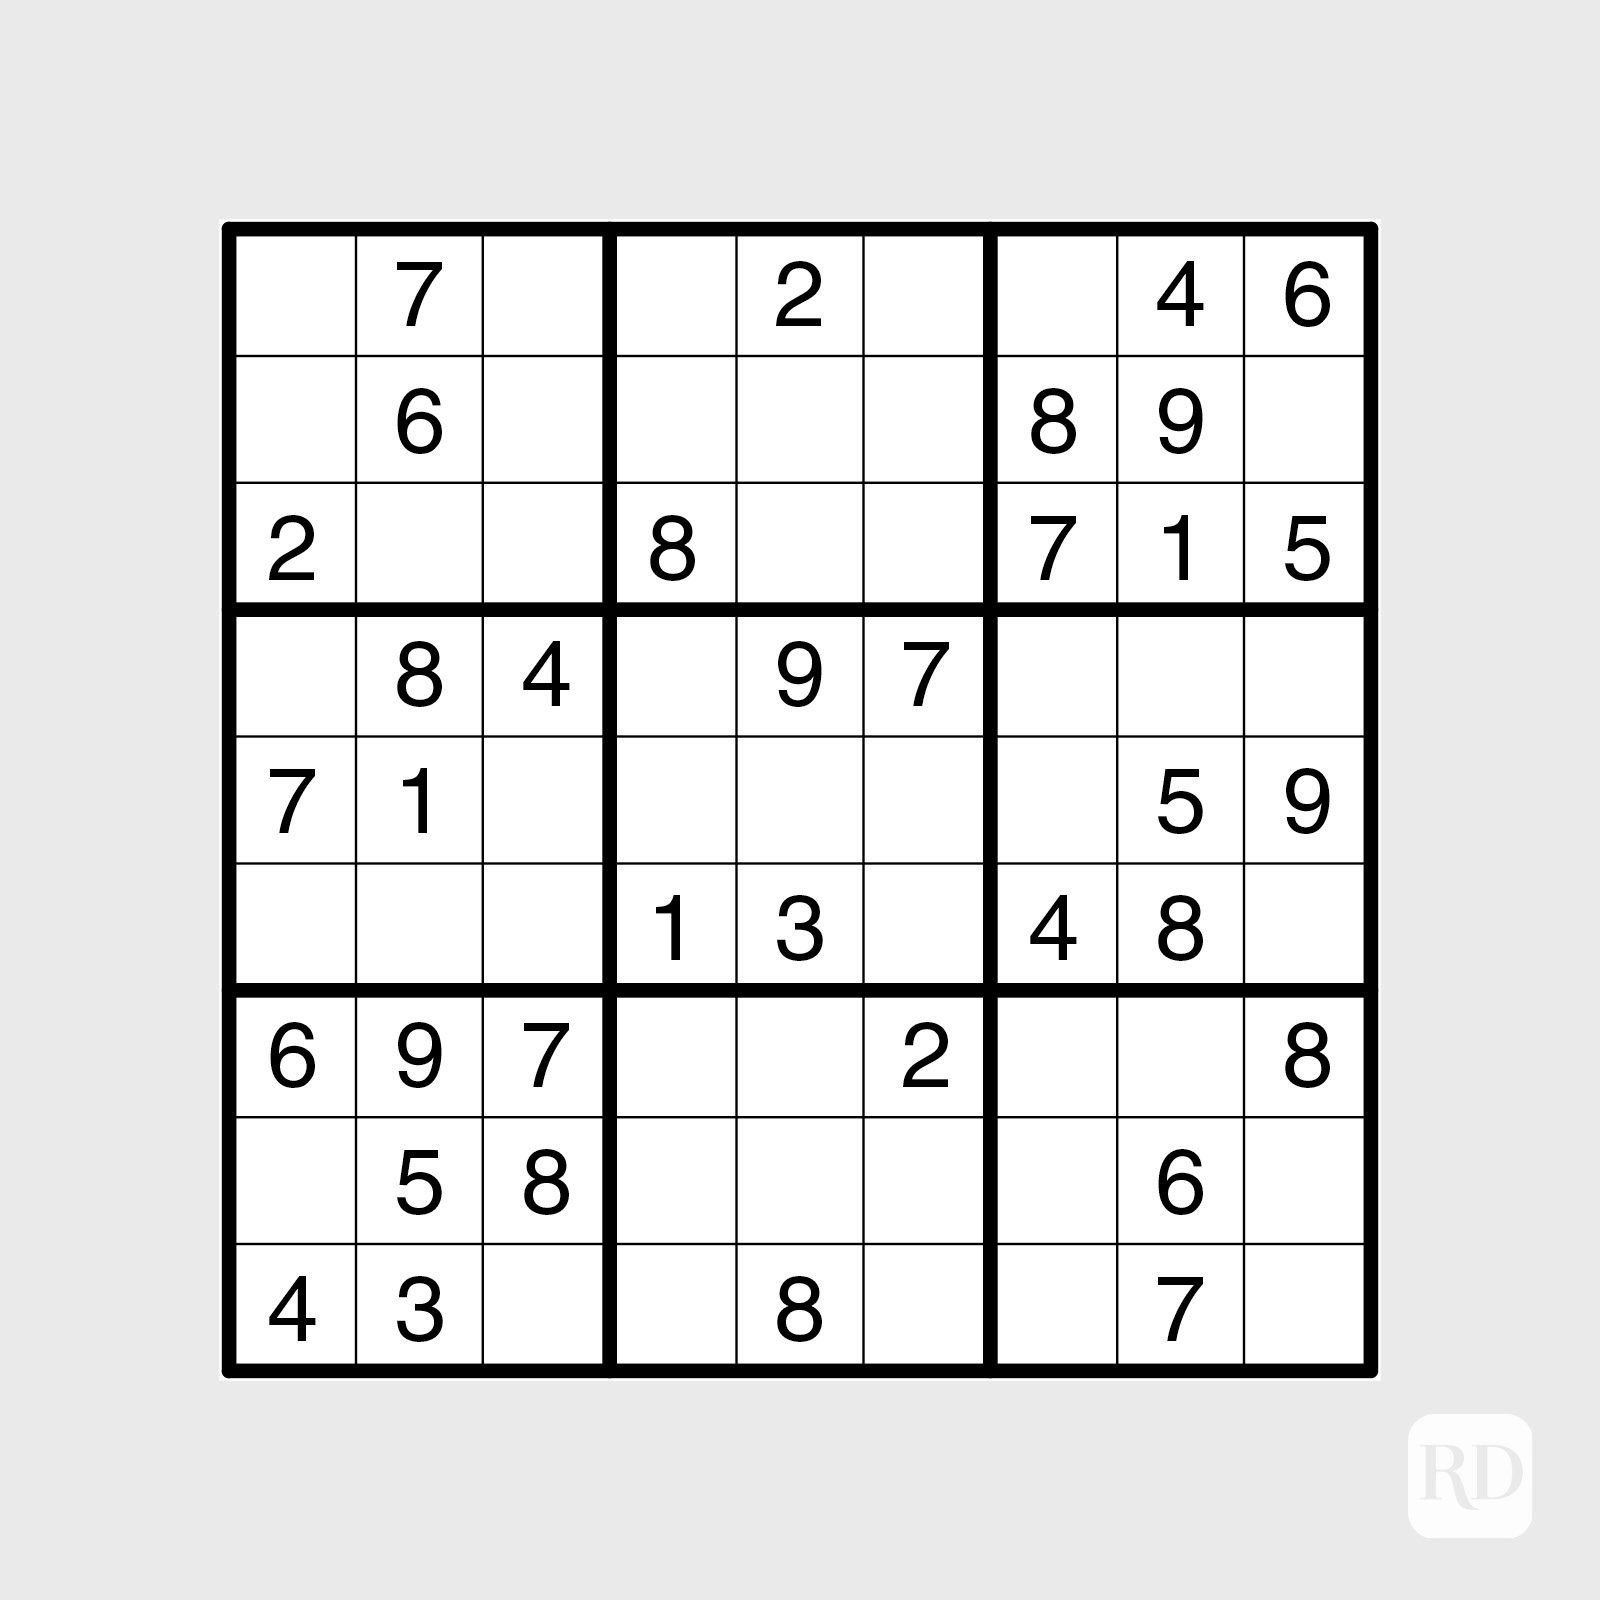

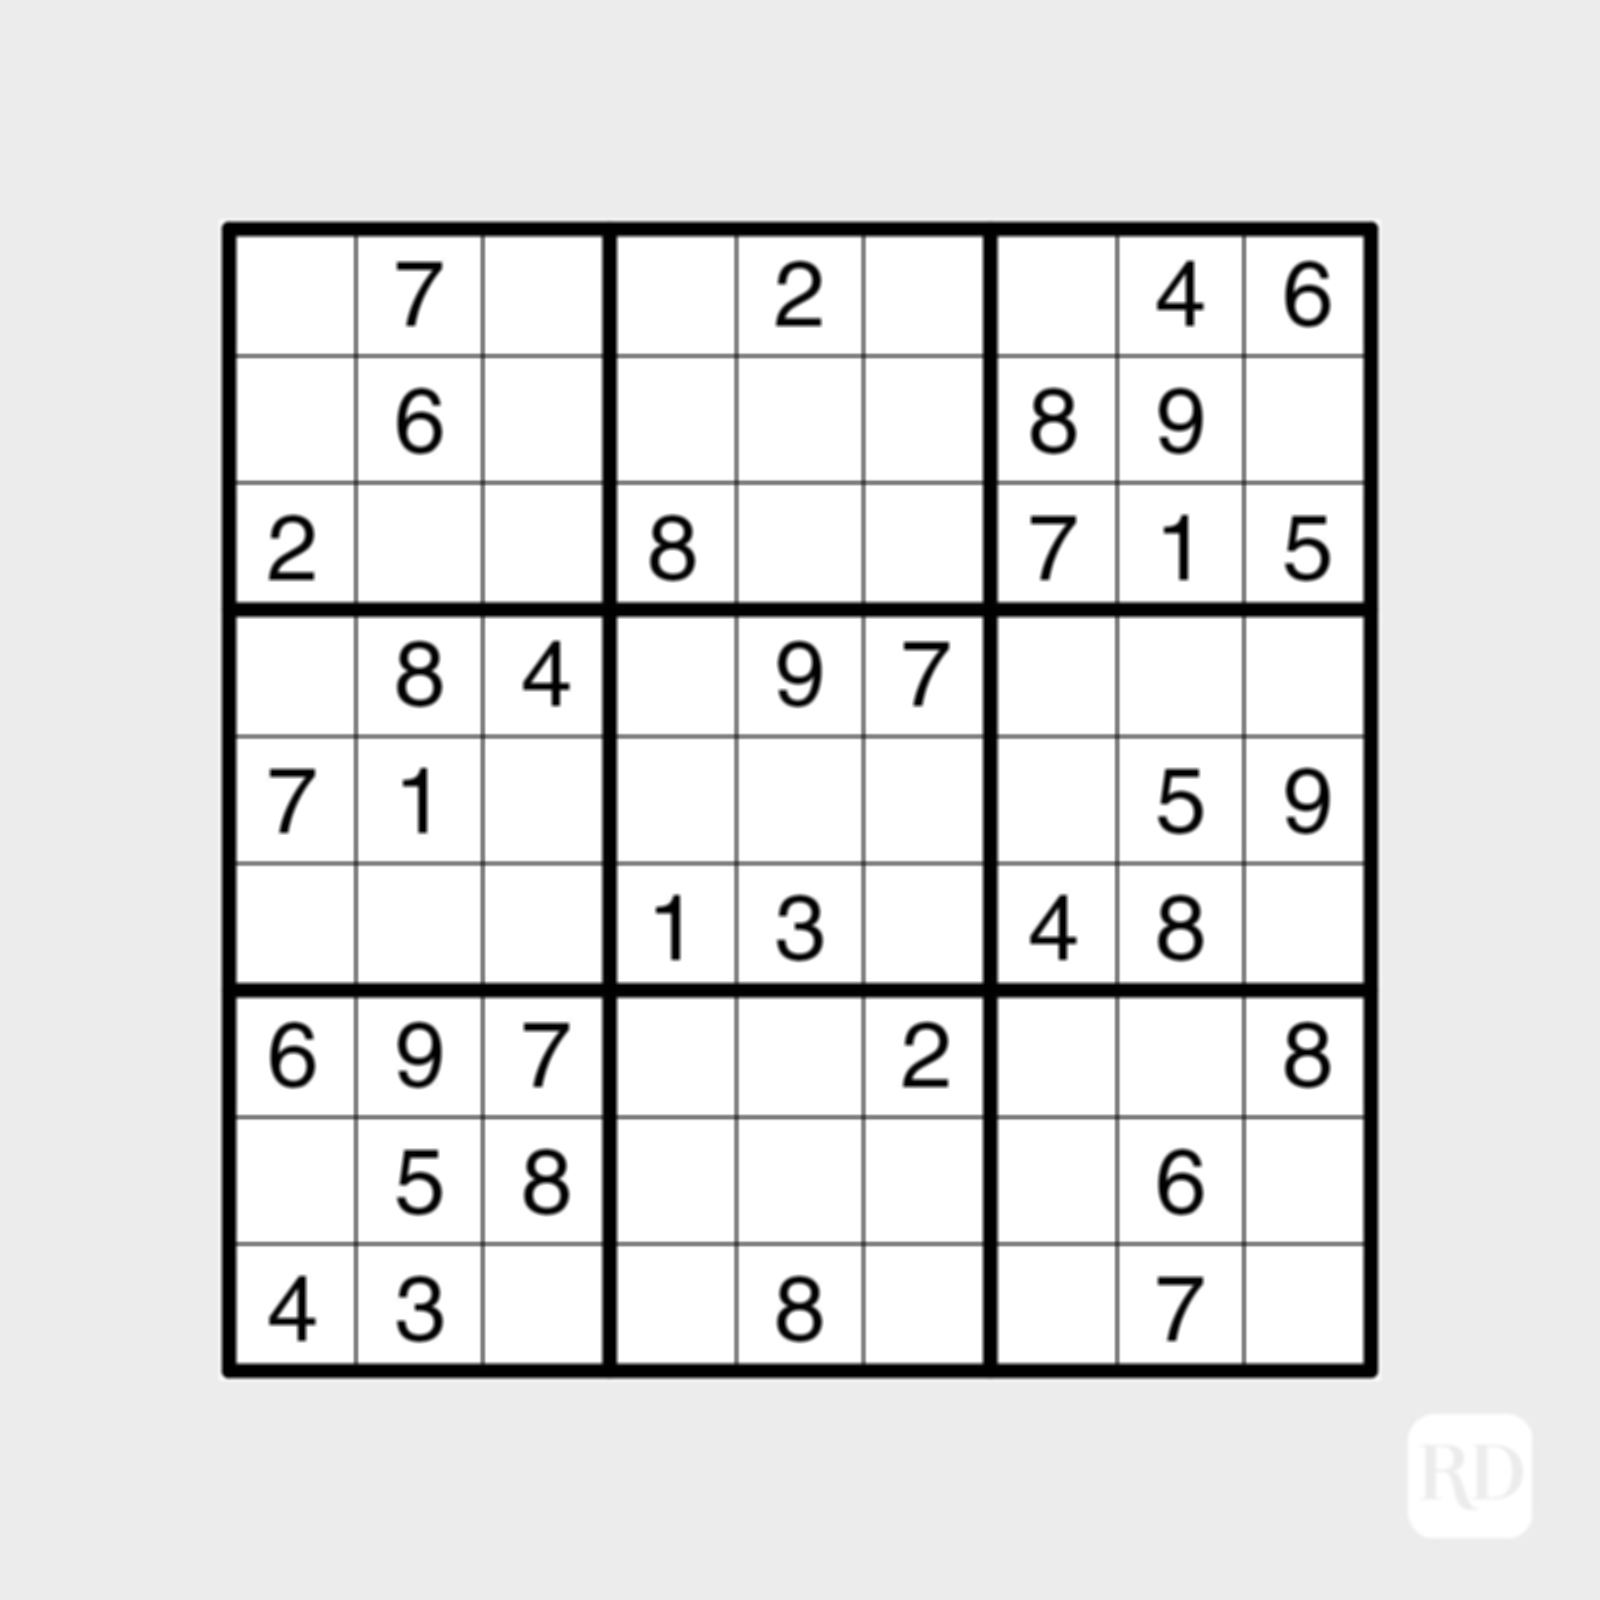

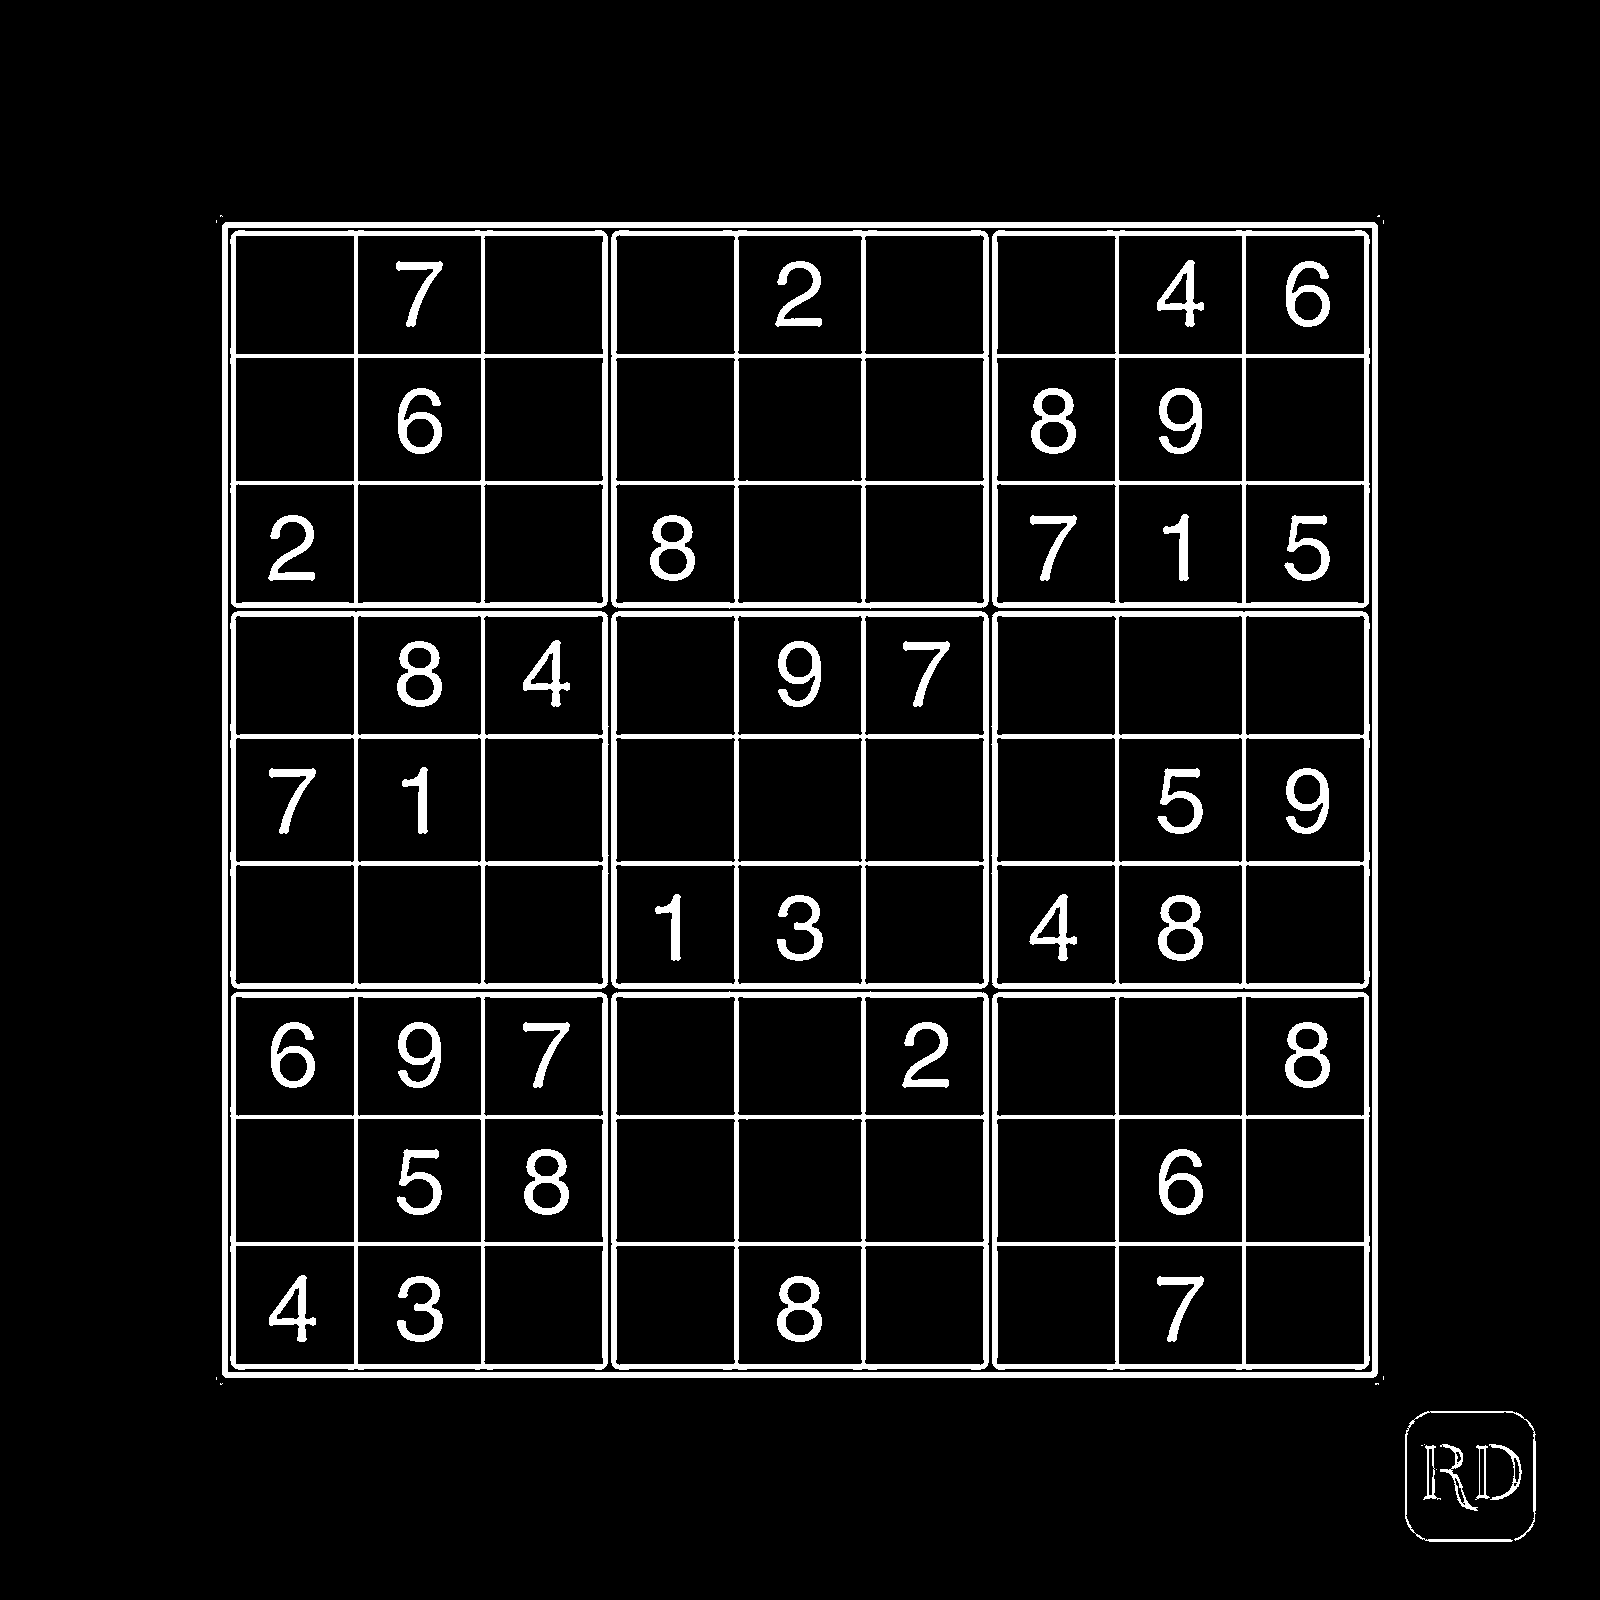

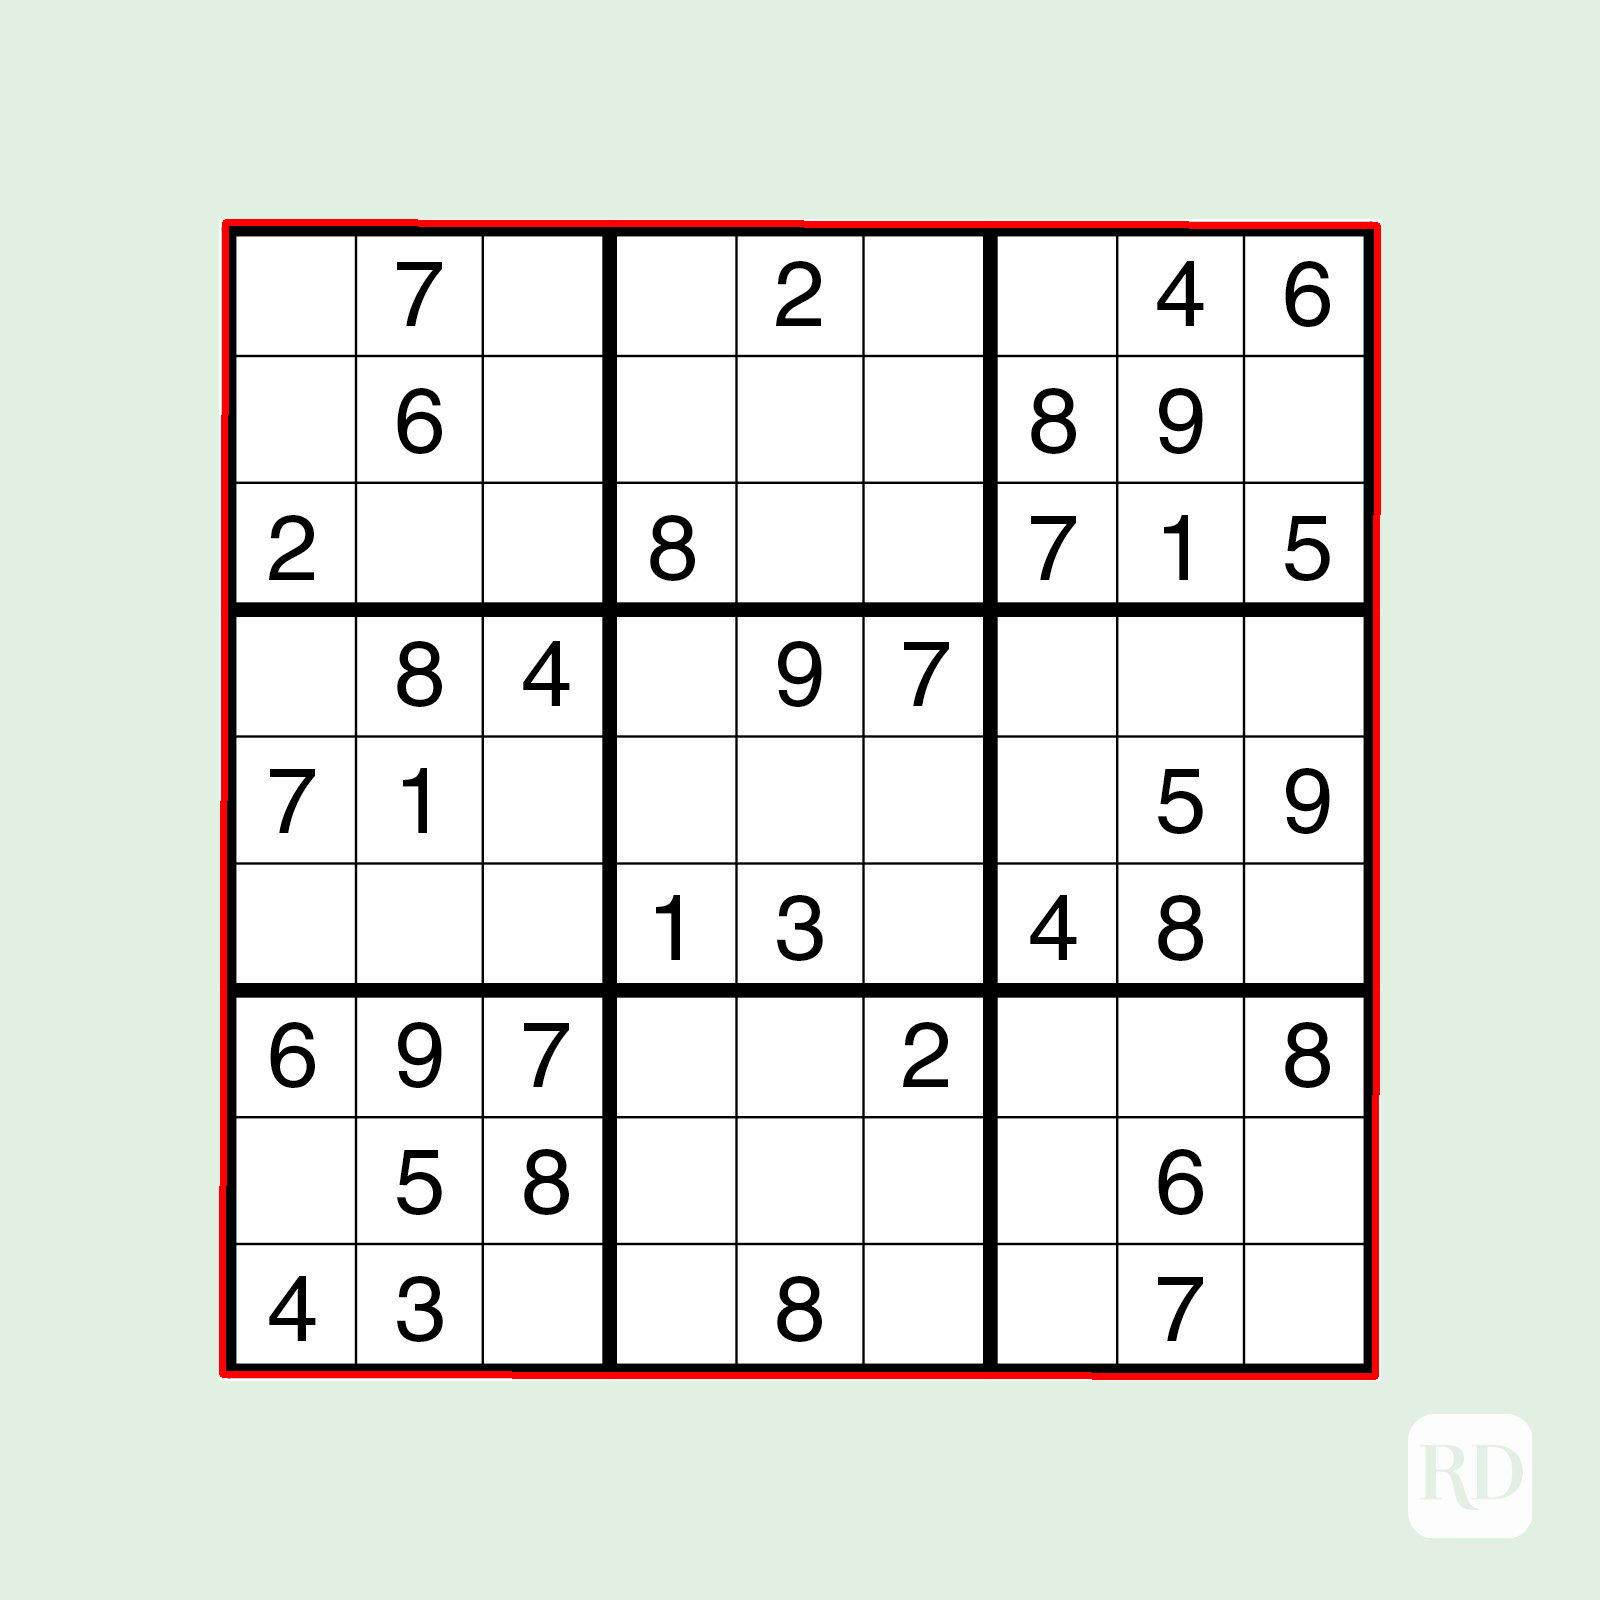

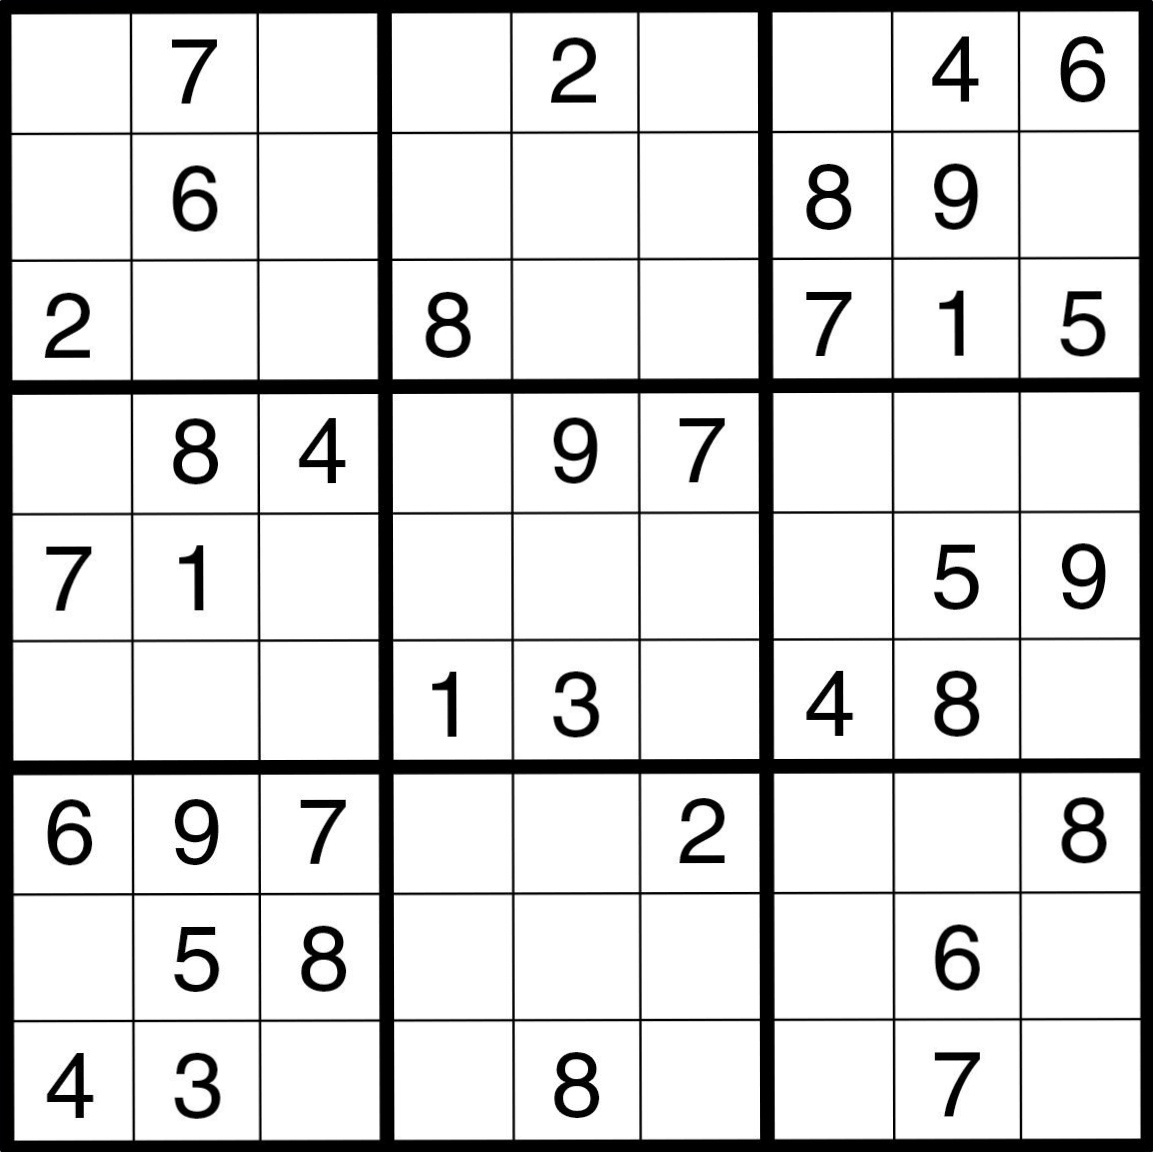

In [ ]:
sudoku_detector(image1)

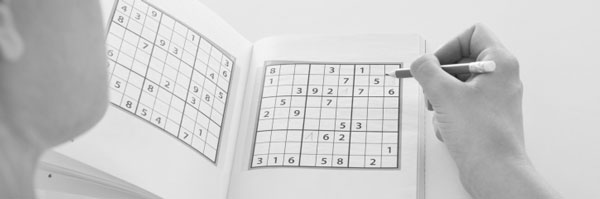

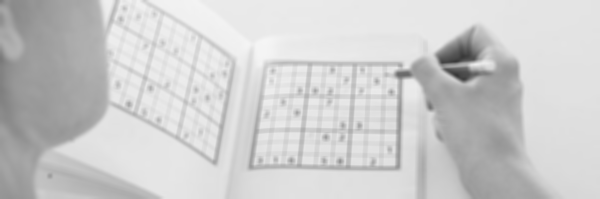

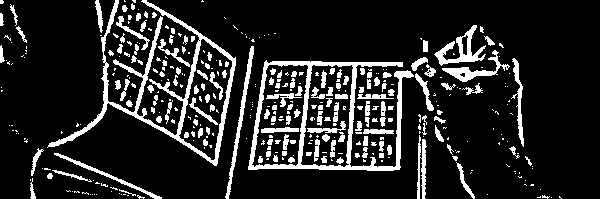

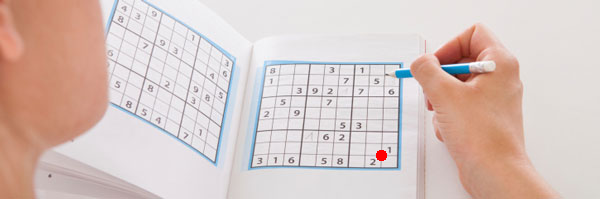

In [ ]:
sudoku_detector(image2)

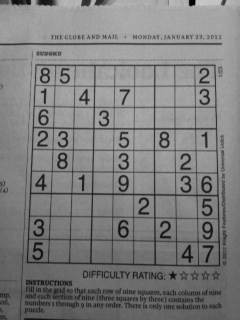

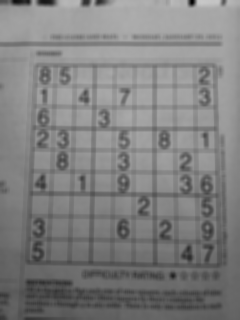

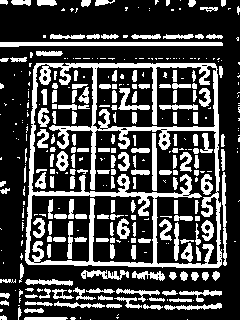

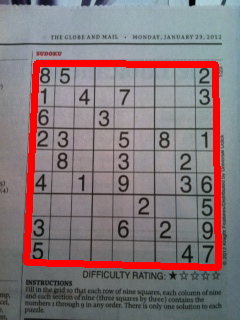

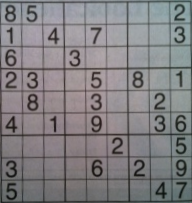

In [ ]:
sudoku_detector(image3)

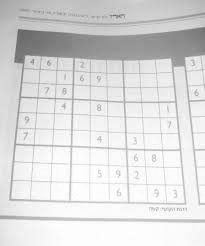

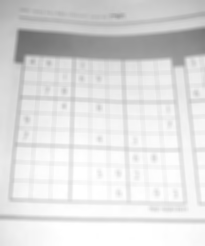

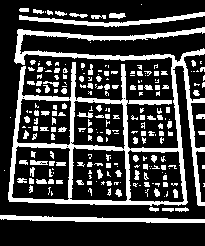

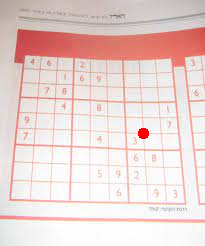

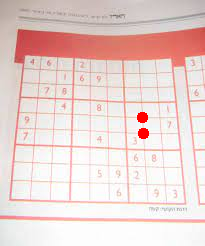

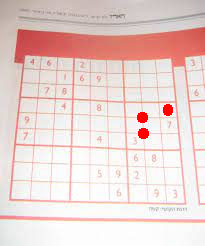

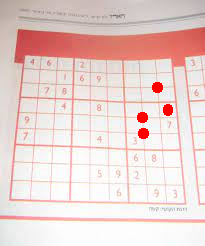

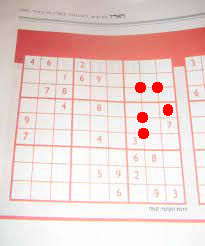

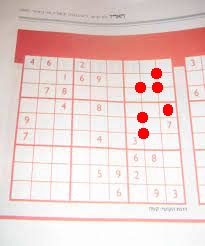

In [ ]:
sudoku_detector(image4)